# 6.2 Exploring relationships

## Importing librairies, path and dataframe

## Checking the dataset

## Deriving new columns

## Exploratory Visual Analysis
### 1. Creation of a correlation matrix and heatmap using matplolib and seaborn
### 2. Creation of scatterplots with seaborn
### 3. Creation of a pair plots for the entire dataframe
### 4. Creation of a categorical plot

## Checking the datasets

## Exporting the dataframes

## Importing librairies, path and dataframe

In [89]:
# Importing librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [91]:
# Defining the path 
path = r'C:\Users\salmi\Desktop\achievement 6'

In [93]:
# Importing the dataframe 
all_years_merge = pd.read_csv(os.path.join(path, 'Data sets', 'Prepared Data Happiness', 'all_years_merge.csv'), index_col = False)

## Checking the dataset

In [96]:
# Display all the columns
pd.set_option('display.max_columns', None)

In [100]:
all_years_merge

,Unnamed: 0,Country,Happiness Rank_2015,Happiness Score_2015,Standard Error_2015,Economy (GDP per Capita)_2015,Family_2015,Health (Life Expectancy)_2015,Freedom_2015,Trust (Government Corruption)_2015,Generosity_2015,Dystopia Residual_2015,Happiness Rank_2016,Happiness Score_2016,Lower Confidence Interval_2016,Upper Confidence Interval_2016,Economy (GDP per Capita)_2016,Family_2016,Health (Life Expectancy)_2016,Freedom_2016,Trust (Government Corruption)_2016,Generosity_2016,Dystopia Residual_2016,Happiness Rank_2017,Happiness Score_2017,Whisker.high_2017,Whisker.low_2017,Economy (GDP per Capita)_2017,Family_2017,Health (Life Expectancy)_2017,Freedom_2017,Generosity_2017,Trust (Government Corruption)_2017,Dystopia.Residual_2017,Happiness Rank_2018,Happiness Score_2018,Economy (GDP per Capita)_2018,Social support_2018,Health (Life Expectancy)_2018,Freedom_2018,Generosity_2018,Trust (Government Corruption)_2018,Happiness Rank_2019,Happiness Score_2019,Economy (GDP per Capita)_2019,Social support_2019,Health (Life Expectancy)_2019,Freedom_2019,Generosity_2019,Trust (Government Corruption)_2019
0,0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343
1,1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
2,2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,7,7.328,1.330,1.532,0.896,0.653,0.321,0.291,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,Rwanda,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,151,3.408,0.332,0.896,0.400,0.636,0.200,0.444,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
137,137,Benin,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,143,3.657,3.745784,3.568217,0.431085,0.435300,0.209930,0.425963,0.207948,0.060929,1.885631,136,4.141,0.378,0.372,0.240,0.440,0.163,0.067,102,4.883,0.393,0.437,0.397,0.349,0.175,0.082
138,138,Syria,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,150,3.462,0.689,0.382,0.539,0.088,0.376,0.144,

In [102]:
# Checking the merge
all_years_merge.isnull().sum()

Unnamed: 0                            0
Country                               0
Happiness Rank_2015                   0
Happiness Score_2015                  0
Standard Error_2015                   0
Economy (GDP per Capita)_2015         0
Family_2015                           0
Health (Life Expectancy)_2015         0
Freedom_2015                          0
Trust (Government Corruption)_2015    0
Generosity_2015                       0
Dystopia Residual_2015                0
Happiness Rank_2016                   0
Happiness Score_2016                  0
Lower Confidence Interval_2016        0
Upper Confidence Interval_2016        0
Economy (GDP per Capita)_2016         0
Family_2016                           0
Health (Life Expectancy)_2016         0
Freedom_2016                          0
Trust (Government Corruption)_2016    0
Generosity_2016                       0
Dystopia Residual_2016                0
Happiness Rank_2017                   0
Happiness Score_2017                  0


#### Since the datasets did not have the same amount of countries, the following code will keep only the countries that appeared in every dataset

In [288]:
# List the columns that should have non-null values for each year
columns_2015 = [col for col in all_years_merge.columns if '_2015' in col]
columns_2016 = [col for col in all_years_merge.columns if '_2016' in col]
columns_2017 = [col for col in all_years_merge.columns if '_2017' in col]
columns_2018 = [col for col in all_years_merge.columns if '_2018' in col]
columns_2019 = [col for col in all_years_merge.columns if '_2019' in col]

# Combine all column lists
all_columns = columns_2015 + columns_2016 + columns_2017 + columns_2018 + columns_2019

# Ensure that'Country' column is included if not present in the list
if 'Country' not in all_columns:
    all_columns.insert(0, 'Country')

# Filter the DataFrame to keep only rows with non-null values across all these columns
all_years_merge_2 = all_years_merge.dropna(subset=all_columns)

In [107]:
# Verify the result
print(all_years_merge_2.columns)
print(all_years_merge_2.shape)
print(all_years_merge_2.head())

Index(['Unnamed: 0', 'Country', 'Happiness Rank_2015', 'Happiness Score_2015',
       'Standard Error_2015', 'Economy (GDP per Capita)_2015', 'Family_2015',
       'Health (Life Expectancy)_2015', 'Freedom_2015',
       'Trust (Government Corruption)_2015', 'Generosity_2015',
       'Dystopia Residual_2015', 'Happiness Rank_2016', 'Happiness Score_2016',
       'Lower Confidence Interval_2016', 'Upper Confidence Interval_2016',
       'Economy (GDP per Capita)_2016', 'Family_2016',
       'Health (Life Expectancy)_2016', 'Freedom_2016',
       'Trust (Government Corruption)_2016', 'Generosity_2016',
       'Dystopia Residual_2016', 'Happiness Rank_2017', 'Happiness Score_2017',
       'Whisker.high_2017', 'Whisker.low_2017',
       'Economy (GDP per Capita)_2017', 'Family_2017',
       'Health (Life Expectancy)_2017', 'Freedom_2017', 'Generosity_2017',
       'Trust (Government Corruption)_2017', 'Dystopia.Residual_2017',
       'Happiness Rank_2018', 'Happiness Score_2018',
       'Ec

In [109]:
# Count the number of occurrences of each country in the original merged DataFrame
all_years_merge['Country'].value_counts()

Country
Switzerland    1
Iran           1
Hungary        1
Honduras       1
Tajikistan     1
              ..
Japan          1
Slovakia       1
Uzbekistan     1
Guatemala      1
Togo           1
Name: count, Length: 141, dtype: int64

## Deriving new columns

In [112]:
# List all columns
all_years_merge_2.columns

Index(['Unnamed: 0', 'Country', 'Happiness Rank_2015', 'Happiness Score_2015',
       'Standard Error_2015', 'Economy (GDP per Capita)_2015', 'Family_2015',
       'Health (Life Expectancy)_2015', 'Freedom_2015',
       'Trust (Government Corruption)_2015', 'Generosity_2015',
       'Dystopia Residual_2015', 'Happiness Rank_2016', 'Happiness Score_2016',
       'Lower Confidence Interval_2016', 'Upper Confidence Interval_2016',
       'Economy (GDP per Capita)_2016', 'Family_2016',
       'Health (Life Expectancy)_2016', 'Freedom_2016',
       'Trust (Government Corruption)_2016', 'Generosity_2016',
       'Dystopia Residual_2016', 'Happiness Rank_2017', 'Happiness Score_2017',
       'Whisker.high_2017', 'Whisker.low_2017',
       'Economy (GDP per Capita)_2017', 'Family_2017',
       'Health (Life Expectancy)_2017', 'Freedom_2017', 'Generosity_2017',
       'Trust (Government Corruption)_2017', 'Dystopia.Residual_2017',
       'Happiness Rank_2018', 'Happiness Score_2018',
       'Ec

##### Here are the common columns to each year to create an average for each factors

Economy (GDP per Capita),
Family,
Health (Life Expectancy),
Freedom,
Generosity,
Trust (Government Corruption)

In [115]:
# List of common factors and their new names
common_factors = [
    ('Happiness Score', 'Averaged Happiness Score'),
    ('Economy (GDP per Capita)', 'Averaged Economy'),
    ('Family', 'Averaged Family'),
    ('Health (Life Expectancy)', 'Averaged Health'),
    ('Freedom', 'Averaged Freedom'),
    ('Generosity', 'Averaged Generosity'),
    ('Trust (Government Corruption)', 'Averaged Trust')
]

# Use .loc to assign new columns to avoid SettingWithCopyWarning
for factor, new_name in common_factors:
    # List of columns corresponding to this factor across all years
    factor_columns = [col for col in all_years_merge_2.columns if factor in col]
    
    # Calculate the average for each country and create a new column with the new name
    all_years_merge_2.loc[:, new_name] = all_years_merge_2[factor_columns].mean(axis=1)

C:\Users\salmi\AppData\Local\Temp\ipykernel_6804\511163724.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_years_merge_2.loc[:, new_name] = all_years_merge_2[factor_columns].mean(axis=1)
C:\Users\salmi\AppData\Local\Temp\ipykernel_6804\511163724.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_years_merge_2.loc[:, new_name] = all_years_merge_2[factor_columns].mean(axis=1)
C:\Users\salmi\AppData\Local\Temp\ipykernel_6804\511163724.py:18: SettingWithCopyWarning: 
A value is trying to be set o

In [117]:
all_years_merge_2

,Unnamed: 0,Country,Happiness Rank_2015,Happiness Score_2015,Standard Error_2015,Economy (GDP per Capita)_2015,Family_2015,Health (Life Expectancy)_2015,Freedom_2015,Trust (Government Corruption)_2015,Generosity_2015,Dystopia Residual_2015,Happiness Rank_2016,Happiness Score_2016,Lower Confidence Interval_2016,Upper Confidence Interval_2016,Economy (GDP per Capita)_2016,Family_2016,Health (Life Expectancy)_2016,Freedom_2016,Trust (Government Corruption)_2016,Generosity_2016,Dystopia Residual_2016,Happiness Rank_2017,Happiness Score_2017,Whisker.high_2017,Whisker.low_2017,Economy (GDP per Capita)_2017,Family_2017,Health (Life Expectancy)_2017,Freedom_2017,Generosity_2017,Trust (Government Corruption)_2017,Dystopia.Residual_2017,Happiness Rank_2018,Happiness Score_2018,Economy (GDP per Capita)_2018,Social support_2018,Health (Life Expectancy)_2018,Freedom_2018,Generosity_2018,Trust (Government Corruption)_2018,Happiness Rank_2019,Happiness Score_2019,Economy (GDP per Capita)_2019,Social support_2019,Health (Life Expectancy)_2019,Freedom_2019,Generosity_2019,Trust (Government Corruption)_2019,Averaged Happiness Score,Averaged Economy,Averaged Family,Averaged Health,Averaged Freedom,Averaged Generosity,Averaged Trust
0,0,Switzerland,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343,7.5114,1.472164,1.337221,0.928318,0.620642,0.277432,0.379763
1,1,Iceland,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.5110,1.386523,1.398688,0.917744,0.618035,0.419124,0.140145
2,2,Denmark,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,7.5460,1.396729,1.358481,0.865249,0.625959,0.318876,0.429374
3,3,Norway,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.5410,1.519381,1.330458,0.873333,0.638049,0.328990,0.343951
4,4,Canada,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,7,7.328,1.330,1.532,0.896,0.653,0.321,0.291,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308,7.3506,1.388129,1.300020,0.900558,0.610954,0.389598,0.305846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,Rwanda,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,152,3.515,3.444,3.586,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,151,3.408,0.332,0.896,0.400,0.636,0.200,0.444,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411,3.4386,0.322057,0.778422,0.417543,0.581611,0.226311,0.473468
137,137,Benin,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,153,3.484,3.404,3.564,0.39499,0.10419,0.2102

In [121]:
# Rank the countries based on 'Averaged Happiness Score'
# The `method='min'` ensures that ranks are assigned with the minimum rank for ties
all_years_merge_2.loc['New Happiness Ranking'] = all_years_merge_2['Averaged Happiness Score'].rank(ascending=False, method='min')

# Sort the dataframe with the new ranking
all_years_merge_2 = all_years_merge_2.sort_values(by='New Happiness Ranking')

In [123]:
all_years_merge_2

,Unnamed: 0,Country,Happiness Rank_2015,Happiness Score_2015,Standard Error_2015,Economy (GDP per Capita)_2015,Family_2015,Health (Life Expectancy)_2015,Freedom_2015,Trust (Government Corruption)_2015,Generosity_2015,Dystopia Residual_2015,Happiness Rank_2016,Happiness Score_2016,Lower Confidence Interval_2016,Upper Confidence Interval_2016,Economy (GDP per Capita)_2016,Family_2016,Health (Life Expectancy)_2016,Freedom_2016,Trust (Government Corruption)_2016,Generosity_2016,Dystopia Residual_2016,Happiness Rank_2017,Happiness Score_2017,Whisker.high_2017,Whisker.low_2017,Economy (GDP per Capita)_2017,Family_2017,Health (Life Expectancy)_2017,Freedom_2017,Generosity_2017,Trust (Government Corruption)_2017,Dystopia.Residual_2017,Happiness Rank_2018,Happiness Score_2018,Economy (GDP per Capita)_2018,Social support_2018,Health (Life Expectancy)_2018,Freedom_2018,Generosity_2018,Trust (Government Corruption)_2018,Happiness Rank_2019,Happiness Score_2019,Economy (GDP per Capita)_2019,Social support_2019,Health (Life Expectancy)_2019,Freedom_2019,Generosity_2019,Trust (Government Corruption)_2019,Averaged Happiness Score,Averaged Economy,Averaged Family,Averaged Health,Averaged Freedom,Averaged Generosity,Averaged Trust,New Happiness Ranking
2,2.0,Denmark,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,3.0,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.0,7.600,1.383,1.573,0.996,0.592,0.252,0.410,7.5460,1.396729,1.358481,0.865249,0.625959,0.318876,0.429374,1.0
3,3.0,Norway,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,4.0,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2.0,7.594,1.456,1.582,0.861,0.686,0.286,0.340,3.0,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.5410,1.519381,1.330458,0.873333,0.638049,0.328990,0.343951,2.0
5,5.0,Finland,6.0,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,5.0,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,5.0,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,1.0,7.632,1.305,1.592,0.874,0.681,0.202,0.393,1.0,7.769,1.340,1.587,0.986,0.596,0.153,0.393,7.5378,1.356960,1.331049,0.873836,0.621536,0.217783,0.398474,3.0
0,0.0,Switzerland,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,4.0,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,5.0,7.487,1.420,1.549,0.927,0.660,0.256,0.357,6.0,7.480,1.452,1.526,1.052,0.572,0.263,0.343,7.5114,1.472164,1.337221,0.928318,0.620642,0.277432,0.379763,4.0
1,1.0,Iceland,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,3.0,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,4.0,7.495,1.343,1.644,0.914,0.677,0.353,0.138,4.0,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.5110,1.386523,1.398688,0.917744,0.618035,0.419124,0.140145,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,129.0,Tanzania,146.0,3.781,0.05061,0.28520,1.00268,0.38215,0.32878,0.05747,0.34377,1.38079,149.0,3.666,3.561,3.771,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769,153.0,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,153.0,3.303,0.455,0.991,0.381,0.481,0.270,0.097,153.0,3.231,0.476,0.885,0.499,0.417,0.276,0.147,3.4660,0.439777,0.940300,0.396732,0.386880,0.311749,0.083699,137.0
136,1

In [127]:
# Check for NaN values in 'Averaged Happiness Score'
all_years_merge_2['Averaged Happiness Score'].isna().sum()

1

In [129]:
# Drop rows with NaN values
all_years_merge_2.dropna(subset=['Averaged Happiness Score'], inplace=True)

In [133]:
all_years_merge_2[['Country', 'Averaged Happiness Score', 'New Happiness Ranking']]

,Country,Averaged Happiness Score,New Happiness Ranking
2,Denmark,7.5460,1.0
3,Norway,7.5410,2.0
5,Finland,7.5378,3.0
0,Switzerland,7.5114,4.0
1,Iceland,7.5110,5.0
...,...,...,...
135,Afghanistan,3.5128,136.0
129,Tanzania,3.4660,137.0
136,Rwanda,3.4386,138.0
138,Syria,3.2922,139.0


## Exploratory Visual Analysis

#### For the analysis, we will focus on the averaged variables for simplification as they are an averaged for all the period from 2015 to 2019

In [153]:
# Selecting the columns
new_happiness_data = all_years_merge_2.loc[:, [
    'Country',
    'Averaged Happiness Score',
    'Averaged Economy',
    'Averaged Family',
    'Averaged Health',
    'Averaged Freedom',
    'Averaged Generosity',
    'Averaged Trust'
]]

In [155]:
new_happiness_data.head()

,Country,Averaged Happiness Score,Averaged Economy,Averaged Family,Averaged Health,Averaged Freedom,Averaged Generosity,Averaged Trust
2,Denmark,7.5460,1.396729,1.358481,0.865249,0.625959,0.318876,0.429374
3,Norway,7.5410,1.519381,1.330458,0.873333,0.638049,0.328990,0.343951
5,Finland,7.5378,1.356960,1.331049,0.873836,0.621536,0.217783,0.398474
0,Switzerland,7.5114,1.472164,1.337221,0.928318,0.620642,0.277432,0.379763
1,Iceland,7.5110,1.386523,1.398688,0.917744,0.618035,0.419124,0.140145


### 1. Creation of a correlation matrix and heatmap using matplotlib and seaborn

In [206]:
# Create a correlation matrix using pandas

# Filter out only numeric columns for correlation matrix
numeric_col_happy_data = new_happiness_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_col_happy_data.corr()

correlation_matrix

,Averaged Happiness Score,Averaged Economy,Averaged Family,Averaged Health,Averaged Freedom,Averaged Generosity,Averaged Trust
Averaged Happiness Score,1.000000,0.817517,0.761669,0.792493,0.583181,0.150183,0.452000
Averaged Economy,0.817517,1.000000,0.670075,0.847938,0.390642,-0.025456,0.375459
Averaged Family,0.761669,0.670075,1.000000,0.596995,0.487520,0.081522,0.266275
Averaged Health,0.792493,0.847938,0.596995,1.000000,0.370622,0.032848,0.319325
Averaged Freedom,0.583181,0.390642,0.487520,0.370622,1.000000,0.343972,0.509428
Averaged Generosity,0.150183,-0.025456,0.081522,0.032848,0.343972,1.000000,0.307364
Averaged Trust,0.452000,0.375459,0.266275,0.319325,0.509428,0.307364,1.000000


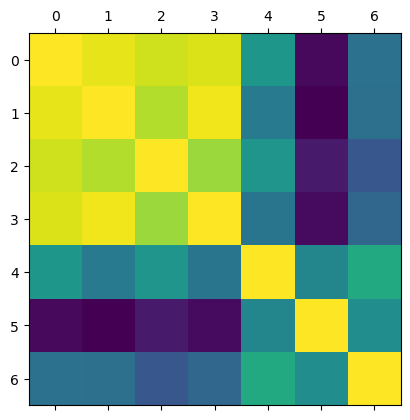

In [208]:
# Create a correlation heatmap using matplotlib

plt.matshow(correlation_matrix.corr())
plt.show()

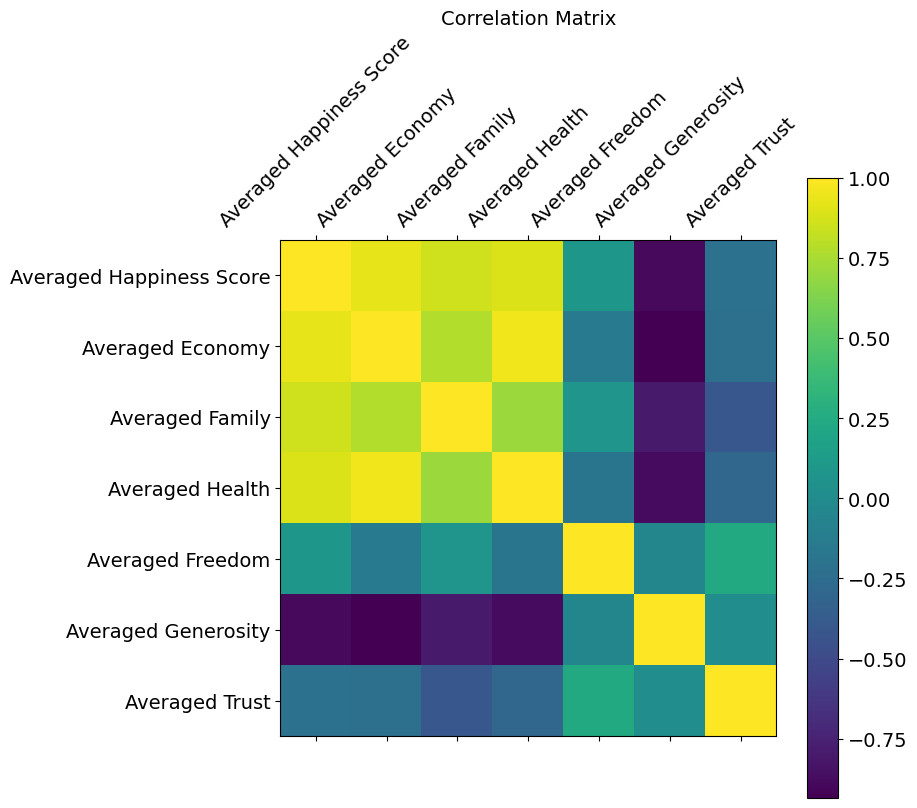

In [210]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(correlation_matrix.corr(), fignum=f.number) # type of plot
plt.xticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(correlation_matrix.shape[1]), correlation_matrix.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

# Saving the figure
plt.savefig(os.path.join(path, 'Visualizations', 'correlation_matrix_1.png'), bbox_inches = 'tight')

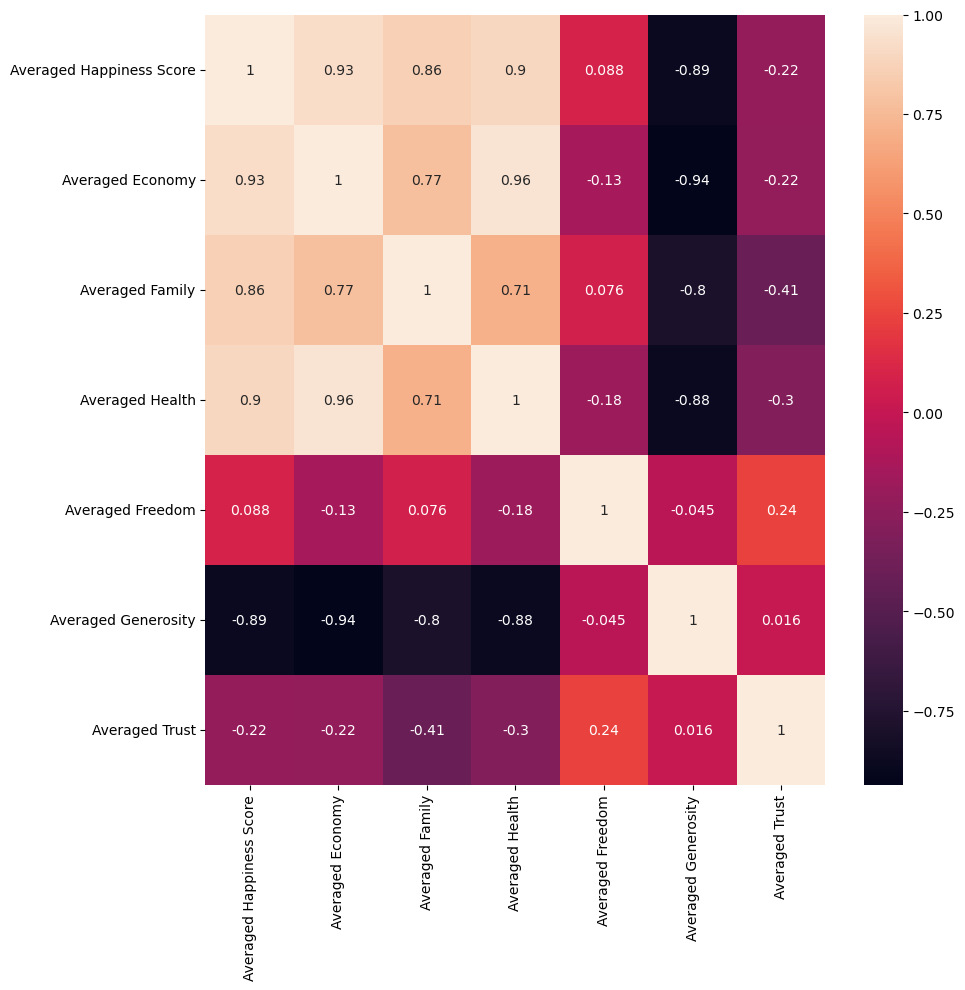

In [212]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_2 = sns.heatmap(correlation_matrix.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

# Saving the heatmap
plt.savefig(os.path.join(path, 'Visualizations', 'heatmap_1.png'), bbox_inches = 'tight')

1) Correlation between Averaged Economy and Averaged Health: 0.96
   This strong positive correlation suggests that wealthier countries tend to have higher life expectancy and better health outcomes. This makes sense as
   higher income levels generally provide better access to healthcare services, contributing to improved overall health.

2) Correlation between Averaged Economy and Averaged Family: 0.77
   This moderate positive correlation implies that countries with stronger economies often have better family dynamics and social support systems. A
   robust economy can enhance family well-being by providing more resources and stability.

3) Correlation between Averaged Generosity and Averaged Economy: -0.94
   This strong negative correlation indicates that higher economic wealth in a country is associated with lower levels of generosity. This might suggest
   that wealthier nations may not necessarily have higher rates of charitable giving or altruistic behavior, potentially due to varying social and
   cultural factors.

4) Averaged Happiness score and the Main Factors
   Overall, there is a stronger correlation between the economy, health, and family with the happiness score. However, when we look at the
   freedom, generosity, and trust factors, the correlation seems to be rather weak or even negative. We can conclude that the first three
   factors weigh more heavily in the happiness score than the latter three.

### 2. Creation of scatterplot with seaborn

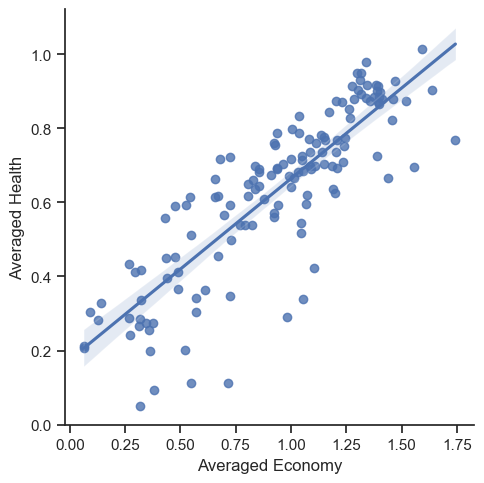

In [255]:
# Create a scatterplot for the "Averaged Economy" and "Averaged Health" columns in seaborn

sns.lmplot(x = 'Averaged Economy', y = 'Averaged Health', data = new_happiness_data)

# Saving the figure
plt.savefig(os.path.join(path, 'Visualizations', 'scatterplot_av_eco_av_health.png'), bbox_inches = 'tight')

As seen in the heatmap, we see a strong positive correlation between Averaged Economy and Averaged Health. As the economy improves, life expectancy also tends to increase, indicating that wealthier countries have better healthcare systems, that leads to a higher happiness score.

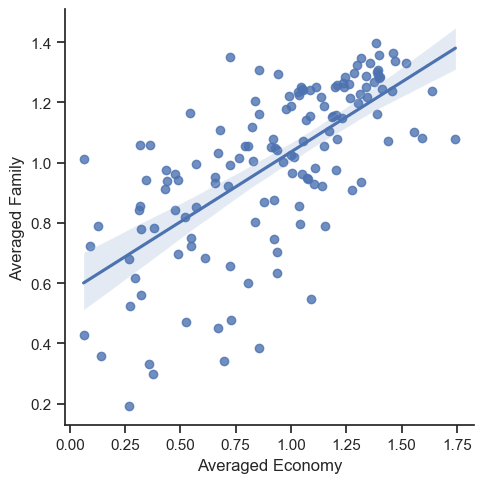

In [257]:
# Create a scatterplot for the "Averaged Economy" and "Averaged Family" columns in seaborn

sns.lmplot(x = 'Averaged Economy', y = 'Averaged Family', data = new_happiness_data)

# Saving the figure
plt.savefig(os.path.join(path, 'Visualizations', 'scatterplot_av_eco_av_fam.png'), bbox_inches = 'tight')

The scatterplot reveals a moderate positive correlation between Averaged Economy and Averaged Family. Higher economic status seems to be associated with better family well-being, suggesting that financial stability positively impacts family life.

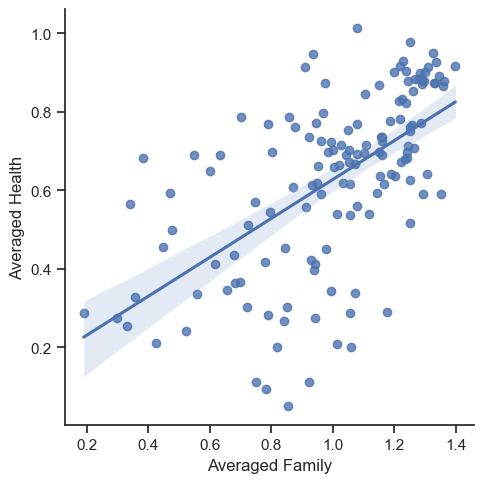

In [259]:
# Create a scatterplot for the "Averaged Health" and "Averaged Family" columns in seaborn

sns.lmplot(x = 'Averaged Family', y = 'Averaged Health', data = new_happiness_data)

# Saving the figure
plt.savefig(os.path.join(path, 'Visualizations', 'scatterplot_av_fam_av_health.png'), bbox_inches = 'tight')

This scatterplot shows a positive correlation between Averaged Family and Averaged Health. Countries with higher family well-being also tend to have better health outcomes, implying that strong family structures contribute to overall health.

### 3. Creation of a pair plots for the entire dataframe

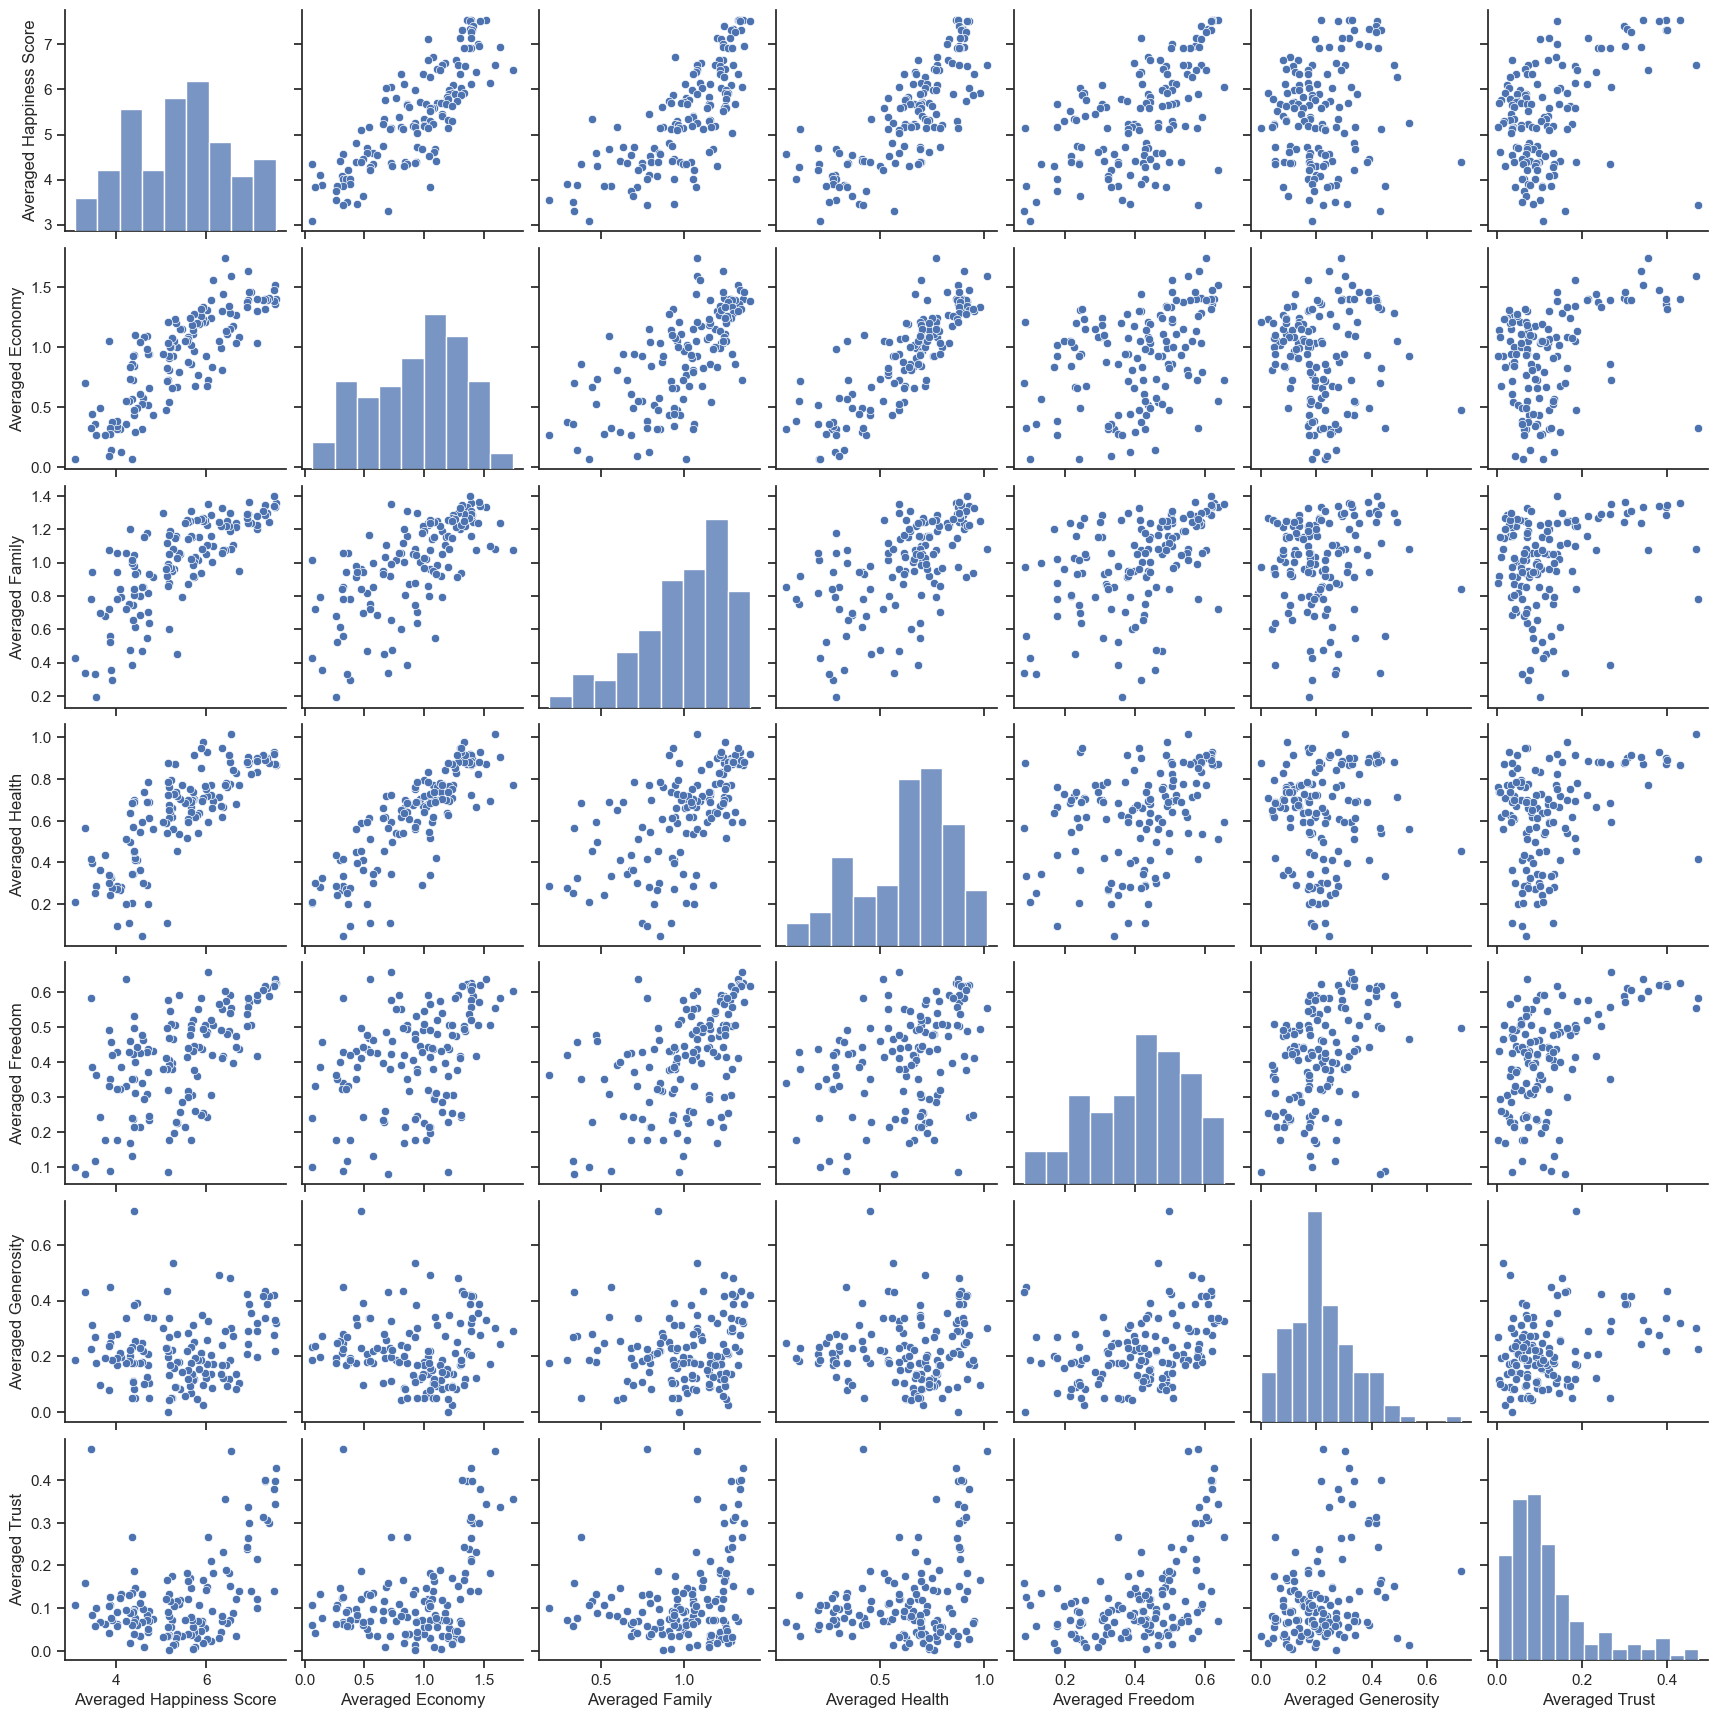

In [261]:
# Using only the numeric columns for the pair plots numeric_col_happy_data

# Create a pair plot 

g = sns.pairplot(numeric_col_happy_data)

# Saving the figure
plt.savefig(os.path.join(path, 'Visualizations', 'pairplots.png'), bbox_inches = 'tight')

1.	Averaged Economy vs. Averaged Health: A clear positive trend is visible, reinforcing the idea that wealthier countries have better health outcomes.
2.	Averaged Generosity vs. Averaged Economy: There appears to be a negative correlation, suggesting that higher economic status does not necessarily translate to higher generosity levels.
3.	Averaged Family vs. Averaged Health: The positive trend here highlights the interconnection between family well-being and health, indicating that these factors often improve together.


### 4. Creation of a categorical plot

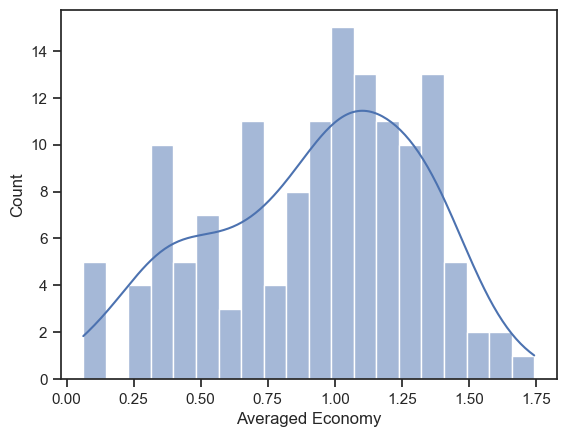

In [263]:
# Creation of a categorical plot for Averaged Economy

sns.histplot(new_happiness_data['Averaged Economy'], bins = 20, kde = True)

# Saving the figure
plt.savefig(os.path.join(path, 'Visualizations', 'cat_plot_avg_eco.png'), bbox_inches = 'tight')

According to this histogram, there seem to be more country that have an economy above 1. 

In [240]:
new_happiness_data.loc[new_happiness_data['Averaged Economy'] < 0.50, 'Wealth Category'] = 'Poor'
new_happiness_data.loc[(new_happiness_data['Averaged Economy'] >= 0.50) & (new_happiness_data['Averaged Economy'] < 1), 'Wealth Category'] = 'Middle'
new_happiness_data.loc[new_happiness_data['Averaged Economy'] >= 1, 'Wealth Category'] = 'Rich'

new_happiness_data['Wealth Category'].value_counts(dropna = False)

Wealth Category
Rich      70
Middle    44
Poor      26
Name: count, dtype: int64

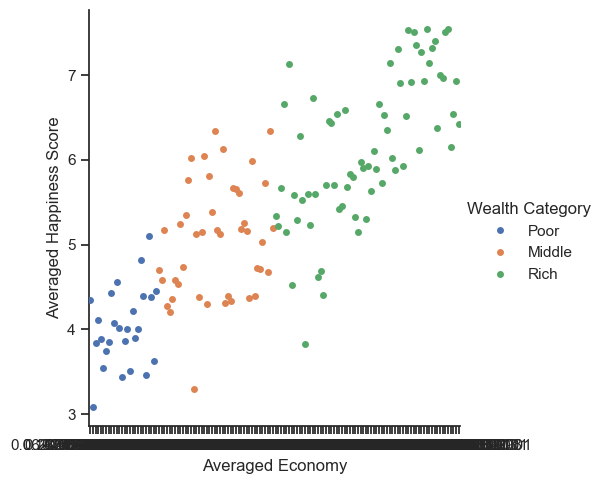

In [286]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Averaged Economy", y="Averaged Happiness Score", hue="Wealth Category", data=new_happiness_data)

plt.savefig(os.path.join(path, 'Visualizations', 'wealth_cat_plot.png'), bbox_inches = 'tight')

<Axes: xlabel='Averaged Health', ylabel='Count'>

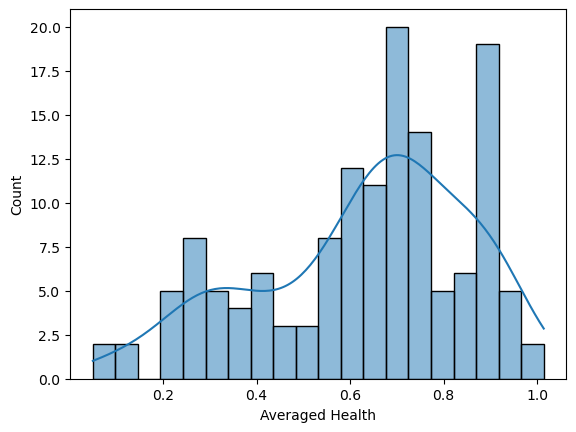

In [236]:
# Creation of a categorical plot for Averaged Health

sns.histplot(new_happiness_data['Averaged Health'], bins = 20, kde = True)

<Axes: xlabel='Averaged Family', ylabel='Count'>

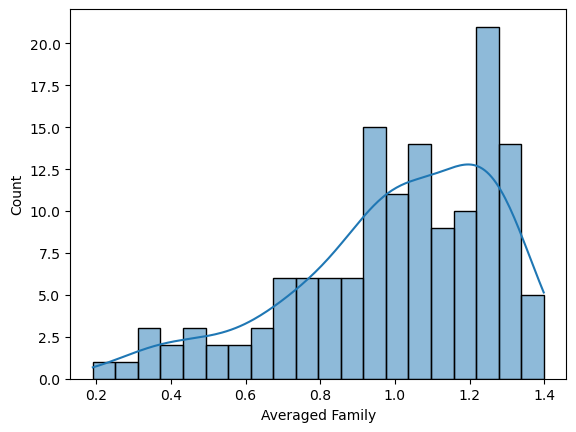

In [238]:
# Creation of a categorical plot for Averaged Family

sns.histplot(new_happiness_data['Averaged Family'], bins = 20, kde = True)

## Checking the datasets

In [273]:
all_years_merge_2

,Unnamed: 0,Country,Happiness Rank_2015,Happiness Score_2015,Standard Error_2015,Economy (GDP per Capita)_2015,Family_2015,Health (Life Expectancy)_2015,Freedom_2015,Trust (Government Corruption)_2015,Generosity_2015,Dystopia Residual_2015,Happiness Rank_2016,Happiness Score_2016,Lower Confidence Interval_2016,Upper Confidence Interval_2016,Economy (GDP per Capita)_2016,Family_2016,Health (Life Expectancy)_2016,Freedom_2016,Trust (Government Corruption)_2016,Generosity_2016,Dystopia Residual_2016,Happiness Rank_2017,Happiness Score_2017,Whisker.high_2017,Whisker.low_2017,Economy (GDP per Capita)_2017,Family_2017,Health (Life Expectancy)_2017,Freedom_2017,Generosity_2017,Trust (Government Corruption)_2017,Dystopia.Residual_2017,Happiness Rank_2018,Happiness Score_2018,Economy (GDP per Capita)_2018,Social support_2018,Health (Life Expectancy)_2018,Freedom_2018,Generosity_2018,Trust (Government Corruption)_2018,Happiness Rank_2019,Happiness Score_2019,Economy (GDP per Capita)_2019,Social support_2019,Health (Life Expectancy)_2019,Freedom_2019,Generosity_2019,Trust (Government Corruption)_2019,Averaged Happiness Score,Averaged Economy,Averaged Family,Averaged Health,Averaged Freedom,Averaged Generosity,Averaged Trust,New Happiness Ranking
2,2.0,Denmark,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,1.0,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2.0,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,3.0,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.0,7.600,1.383,1.573,0.996,0.592,0.252,0.410,7.5460,1.396729,1.358481,0.865249,0.625959,0.318876,0.429374,1.0
3,3.0,Norway,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,4.0,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,1.0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2.0,7.594,1.456,1.582,0.861,0.686,0.286,0.340,3.0,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.5410,1.519381,1.330458,0.873333,0.638049,0.328990,0.343951,2.0
5,5.0,Finland,6.0,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,5.0,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,5.0,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,1.0,7.632,1.305,1.592,0.874,0.681,0.202,0.393,1.0,7.769,1.340,1.587,0.986,0.596,0.153,0.393,7.5378,1.356960,1.331049,0.873836,0.621536,0.217783,0.398474,3.0
0,0.0,Switzerland,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2.0,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,4.0,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,5.0,7.487,1.420,1.549,0.927,0.660,0.256,0.357,6.0,7.480,1.452,1.526,1.052,0.572,0.263,0.343,7.5114,1.472164,1.337221,0.928318,0.620642,0.277432,0.379763,4.0
1,1.0,Iceland,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,3.0,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,3.0,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,4.0,7.495,1.343,1.644,0.914,0.677,0.353,0.138,4.0,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.5110,1.386523,1.398688,0.917744,0.618035,0.419124,0.140145,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,135.0,Afghanistan,153.0,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,154.0,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,141.0,3.794,3.873661,3.714338,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,2.150801,145.0,3.632,0.332,0.537,0.255,0.085,0.191,0.036,154.0,3.203,0.350,0.517,0.361,0.000,0.158,0.025,3.5128,0.357113,0.331588,0.254707,0.117924,0.267730,0.058094,136.0
12

In [275]:
new_happiness_data

,Country,Averaged Happiness Score,Averaged Economy,Averaged Family,Averaged Health,Averaged Freedom,Averaged Generosity,Averaged Trust,Wealth Category
2,Denmark,7.5460,1.396729,1.358481,0.865249,0.625959,0.318876,0.429374,Rich
3,Norway,7.5410,1.519381,1.330458,0.873333,0.638049,0.328990,0.343951,Rich
5,Finland,7.5378,1.356960,1.331049,0.873836,0.621536,0.217783,0.398474,Rich
0,Switzerland,7.5114,1.472164,1.337221,0.928318,0.620642,0.277432,0.379763,Rich
1,Iceland,7.5110,1.386523,1.398688,0.917744,0.618035,0.419124,0.140145,Rich
...,...,...,...,...,...,...,...,...,...
135,Afghanistan,3.5128,0.357113,0.331588,0.254707,0.117924,0.267730,0.058094,Poor
129,Tanzania,3.4660,0.439777,0.940300,0.396732,0.386880,0.311749,0.083699,Poor
136,Rwanda,3.4386,0.322057,0.778422,0.417543,0.581611,0.226311,0.473468,Poor
138,Syria,3.2922,0.699109,0.339884,0.566281,0.081700,0.431285,0.159547,Middle


## Exporting the datasets

In [280]:
all_years_merge_2.to_csv(os.path.join(path, 'Data sets', 'Prepared Data Happiness', 'all_years_merge_2_derived_data.csv'))

In [282]:
new_happiness_data.to_csv(os.path.join(path, 'Data sets', 'Prepared Data Happiness', 'new_happiness_data_only_avg_factors.csv'))